<h1>Zomato Restaurant Data Analysis Python Project</h1>

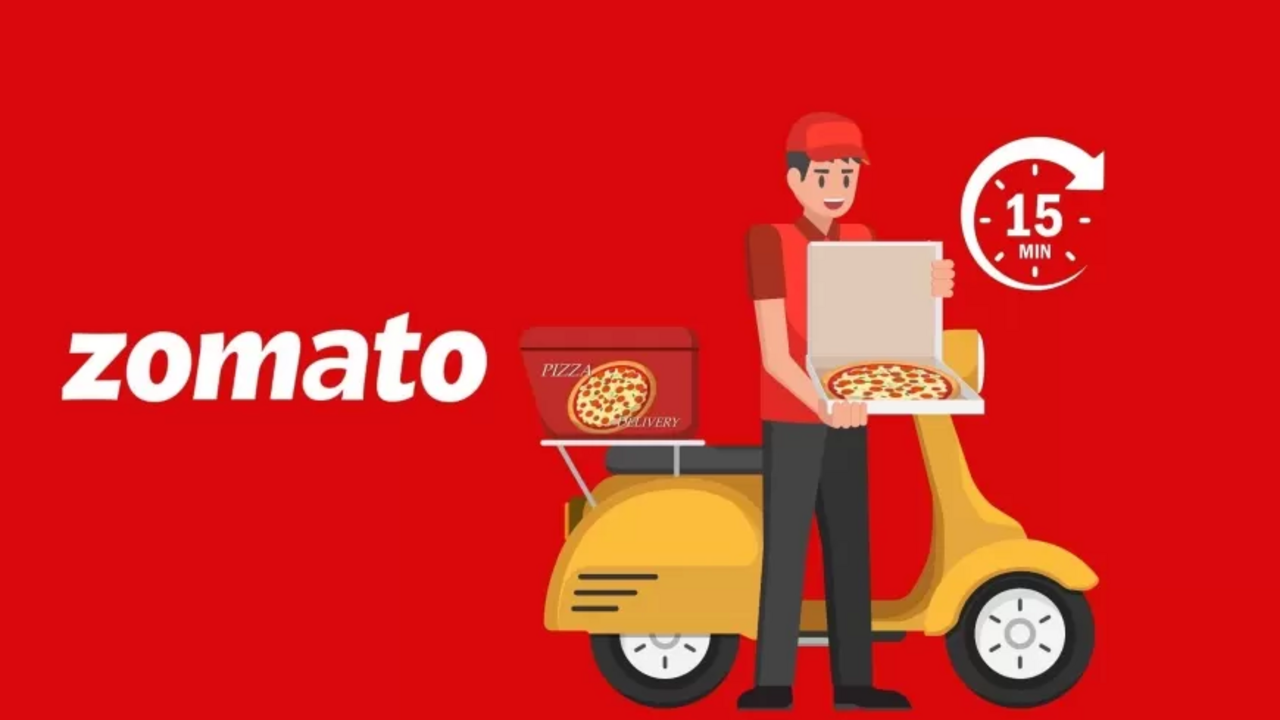

In [2]:
from IPython.display import Image
display(Image(filename="/home/rguktrkvalley/Downloads/zomato_datascience.jpg", width=700))

<h2>Importing the essential libraries</h2>

In [4]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h3>Reading and Exploring Data</h3>

In [6]:
df=pd.read_csv("/home/rguktrkvalley/Downloads/zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [7]:
#checking shape of dataframe
df.shape

(51717, 17)

In [8]:
#checking columns
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [9]:
#data types of columns
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [10]:
df.info

<bound method DataFrame.info of                                                      url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
3      https://www.zomato.com/bangalore/addhuri-udupi...   
4      https://www.zomato.com/bangalore/grand-village...   
...                                                  ...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51713  https://www.zomato.com/bangalore/vinod-bar-and...   
51714  https://www.zomato.com/bangalore/plunge-sherat...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      

In [11]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [12]:
#checking nulls in each column
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [13]:
#checking duplicates
df.duplicated().sum()

0

<h3>Data Cleaning and preprocessing</h3>

In [15]:
#Transforming rate column
df['rate']=df['rate'].astype(str)
df['rate']=df['rate'].replace(['NEW','-'],np.nan)
df['rate']=df['rate'].str.replace("/5","")
df['rate']=df['rate'].astype(float)
print("Datatype: ",df['rate'].dtypes)
print(df['rate'].isnull().sum())
df.head(2)

Datatype:  float64
10052


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [16]:
#dropping the nulls in rate
df.dropna(subset=['rate'],inplace=True)

In [17]:
df['rate'].isnull().sum()

0

In [18]:
#filling the location with city for null values
df['location']=df['location'].fillna(df['listed_in(city)'])
df['location']

0                      Banashankari
1                      Banashankari
2                      Banashankari
3                      Banashankari
4                      Basavanagudi
                    ...            
51709                    Whitefield
51711                    Whitefield
51712                    Whitefield
51715    ITPL Main Road, Whitefield
51716    ITPL Main Road, Whitefield
Name: location, Length: 41665, dtype: object

In [19]:
#Filling null valuesof rest_type with unknown
df['rest_type']=df['rest_type'].fillna("Unknown")
df[df['rest_type'].isnull()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)


In [20]:
df.loc[999]

url                            https://www.zomato.com/bangalore/mughlai-kitch...
address                        77/2 BDA Road, Opposite RR Layout, BTM 6th Sta...
name                                                             Mughlai Kitchen
online_order                                                                 Yes
book_table                                                                    No
rate                                                                         3.5
votes                                                                        269
phone                                         +91 9663197947\r\r\n+91 9986692090
location                                                                     BTM
rest_type                                                                Unknown
dish_liked                                                     Momos, Oreo Shake
cuisines                                   Mughlai, North Indian, Chinese, Momos
approx_cost(for two people) 

In [21]:
#filling the null values of dish_liked and cusines with not available
df[['dish_liked','cuisines']]=df[['dish_liked','cuisines']].fillna("Not available")

In [22]:
#Transforming cost
df['approx_cost(for two people)']=df['approx_cost(for two people)'].str.replace(',','')
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(float)
df['approx_cost(for two people)']

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51709     800.0
51711     800.0
51712    1500.0
51715    2500.0
51716    1500.0
Name: approx_cost(for two people), Length: 41665, dtype: float64

In [23]:
df.isnull().sum()

url                              0
address                          0
name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
phone                          814
location                         0
rest_type                        0
dish_liked                       0
cuisines                         0
approx_cost(for two people)    247
reviews_list                     0
menu_item                        0
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

In [24]:
#grouping for calculating corresponding median
group=df.groupby(['rest_type','location'])['approx_cost(for two people)'].median().head(2000)
group

rest_type  location         
Bakery     BTM                   450.0
           Banashankari          300.0
           Banaswadi             500.0
           Bannerghatta Road     400.0
           Basavanagudi          300.0
                                 ...  
Unknown    Marathahalli          500.0
           Old Airport Road      300.0
           Sarjapur Road        1000.0
           Thippasandra          600.0
           Whitefield            400.0
Name: approx_cost(for two people), Length: 1311, dtype: float64

In [25]:
#filling null values with corresponding group median
df['approx_cost(for two people)']=df['approx_cost(for two people)'].fillna(df.groupby(['location','rest_type'])['approx_cost(for two people)'].transform('median'))

In [26]:
df.loc[49373]

url                            https://www.zomato.com/bangalore/owls-kitchen-...
address                                Chandra Mansion, Sarjapur Road, Bangalore
name                                                               Owl's Kitchen
online_order                                                                  No
book_table                                                                    No
rate                                                                         2.6
votes                                                                         53
phone                                                                        NaN
location                                                           Sarjapur Road
rest_type                                                                Unknown
dish_liked                                                   Manchurian, Noodles
cuisines                                                   North Indian, Chinese
approx_cost(for two people) 

In [27]:
df[df['approx_cost(for two people)'].isnull()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
5797,https://www.zomato.com/bangalore/priyas-punjab...,"Golla Halli, Electronic City, Phase 1, Near Ta...",Priya's Punjabi,No,No,3.8,33,NaN,Koramangala 8th Block,Casual Dining,Not available,North Indian,NaN,"[('Rated 3.0', ""RATED\n Hello foodies\nOne mo...",[],Delivery,Brigade Road
9921,https://www.zomato.com/bangalore/priyas-punjab...,"Golla Halli, Electronic City, Phase 1, Near Ta...",Priya's Punjabi,No,No,3.8,33,NaN,Koramangala 8th Block,Casual Dining,Not available,North Indian,NaN,"[('Rated 3.0', ""RATED\n Hello foodies\nOne mo...",[],Delivery,BTM
13958,https://www.zomato.com/bangalore/priyas-punjab...,"Golla Halli, Electronic City, Phase 1, Near Ta...",Priya's Punjabi,No,No,3.8,33,NaN,Koramangala 8th Block,Casual Dining,Not available,North Indian,NaN,"[('Rated 3.0', ""RATED\n Hello foodies\nOne mo...",[],Delivery,Electronic City
14552,https://www.zomato.com/bangalore/priyas-punjab...,"Golla Halli, Electronic City, Phase 1, Near Ta...",Priya's Punjabi,No,No,3.8,33,NaN,Koramangala 8th Block,Casual Dining,Not available,North Indian,NaN,"[('Rated 3.0', ""RATED\n Hello foodies\nOne mo...",[],Dine-out,Electronic City
17360,https://www.zomato.com/bangalore/familiar-food...,"2614, Opposite CPWD Campus, 27th Main, Sector ...",Familiar Food Court,No,No,2.6,43,NaN,HSR,Food Court,Chaat,"Mughlai, Chinese, North Indian, South Indian, ...",NaN,"[('Rated 1.0', 'RATED\n Ordered chicken schez...",[],Dine-out,HSR
20830,https://www.zomato.com/bangalore/priyas-punjab...,"Golla Halli, Electronic City, Phase 1, Near Ta...",Priya's Punjabi,No,No,3.8,33,NaN,Koramangala 8th Block,Casual Dining,Not available,North Indian,NaN,"[('Rated 3.0', ""RATED\n Hello foodies\nOne mo...",[],Delivery,Jayanagar
28103,https://www.zomato.com/bangalore/priyas-punjab...,"Golla Halli, Electronic City, Phase 1, Near Ta...",Priya's Punjabi,No,No,3.8,33,NaN,Koramangala 8th Block,Casual Dining,Not available,North Indian,NaN,"[('Rated 3.0', ""RATED\n Hello foodies\nOne mo...",[],Delivery,Koramangala 4th Block
30480,https://www.zomato.com/bangalore/priyas-punjab...,"Golla Halli, Electronic City, Phase 1, Near Ta...",Priya's Punjabi,No,No,3.8,33,NaN,Koramangala 8th Block,Casual Dining,Not available,North Indian,NaN,"[('Rated 3.0', ""RATED\n Hello foodies\nOne mo...",[],Delivery,Koramangala 5th Block
33284,https://www.zomato.com/bangalore/priyas-punjab...,"Golla Halli, Electronic City, Phase 1, Near Ta...",Priya's Punjabi,No,No,3.8,33,NaN,Koramangala 8th Block,Casual Dining,Not available,North Indian,NaN,"[('Rated 3.0', ""RATED\n Hello foodies\nOne mo...",[],Delivery,Koramangala 6th Block
35967,https://www.zomato.com/bangalore/priyas-punjab...,"Golla Halli, Electronic City, Phase 1, Near Ta...",Priya's Punjabi,No,No,3.8,33,NaN,Koramangala 8th Block,Casual Dining,Not available,North Indian,NaN,"[('Rated 3.0', ""RATED\n Hello foodies\nOne mo...",[],Delivery,Koramangala 7th Block


In [28]:
#calculating overall median
overall_median=df['approx_cost(for two people)'].median()
overall_median

500.0

In [29]:
#filling null values with overall median
df['approx_cost(for two people)']=df['approx_cost(for two people)'].fillna(overall_median)
df.isnull().sum()

url                              0
address                          0
name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
phone                          814
location                         0
rest_type                        0
dish_liked                       0
cuisines                         0
approx_cost(for two people)      0
reviews_list                     0
menu_item                        0
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

In [30]:
df.duplicated().sum()

0

In [31]:
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,https://www.zomato.com/bangalore/the-farm-hous...,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,3.7,34,+91 9980121279\n+91 9900240646,Whitefield,"Casual Dining, Bar",Not available,"North Indian, Continental",800.0,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield
51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5,81,080 65951222,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,Whitefield,Bar,Not available,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


<h3>Exploratory data Analysis & Visualizations</h3>

<h4>1.Locations with restaurants count</h4>

In [34]:
#1. Which 10 locations with most Restaurants
top_locations=df['location'].value_counts().head(10)
top_locations

location
BTM                      3930
Koramangala 5th Block    2319
HSR                      2019
Indiranagar              1847
JP Nagar                 1717
Jayanagar                1643
Whitefield               1582
Marathahalli             1443
Bannerghatta Road        1235
Koramangala 6th Block    1077
Name: count, dtype: int64

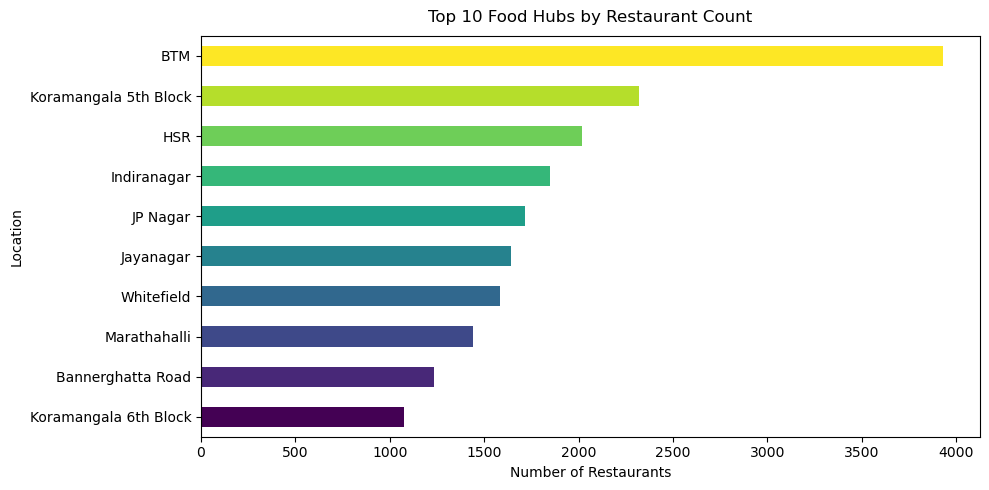

In [35]:
#Bar chart
plt.figure(figsize=(10,5))
colors=plt.cm.viridis(np.linspace(0,1,len(top_locations)))
top_locations.sort_values().plot(kind='barh',color=colors)
plt.title('Top 10 Food Hubs by Restaurant Count',pad=10)
plt.xlabel('Number of Restaurants')
plt.ylabel('Location')
plt.tight_layout()
plt.style.use("dark_background")
plt.show()

<p>BTM and Koramangala dominate Bangalore’s restaurant landscape, highlighting the impact of youth population, IT presence, and nightlife on restaurant density.</p>

<h4>2. Top 10 Cuisines</h4>

In [38]:
##2.Top 10 cuisines
split_cuisines=df['cuisines'].str.split(", ").explode().str.strip()
top_cuisines=split_cuisines.value_counts().head(10)
top_cuisines

cuisines
North Indian    17406
Chinese         13005
South Indian     6394
Fast Food        6360
Continental      5245
Biryani          5071
Cafe             4828
Desserts         4537
Beverages        3873
Italian          3213
Name: count, dtype: int64

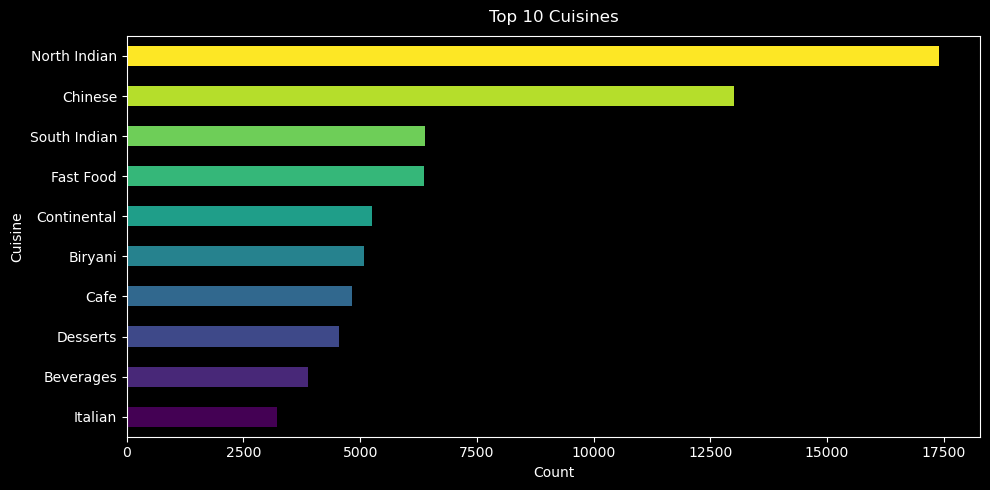

In [39]:
#visualization - Bar chart
plt.figure(figsize=(10,5))
colors=plt.cm.viridis(np.linspace(0,1,len(top_locations)))
top_cuisines.sort_values().plot(kind='barh',color=colors)
plt.title('Top 10 Cuisines',pad=10)
plt.xlabel('Count')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.savefig("Top 10 Cusines.png", dpi=300, bbox_inches="tight")
plt.show()

<p>North Indian and Chinese cuisines collectively define Bangalore’s mainstream dining preferences, while cafés and dessert outlets highlight evolving urban food trends.</p>

<h4>3. Online orders Vs Table Bookings</h4>

In [42]:
#3.Analysis Online orders vS Table Bookings
online_orders=(df['online_order']=='Yes').sum()
bookings_table=(df['book_table']=='Yes').sum()
print(online_orders)
print(bookings_table)

27206
6304


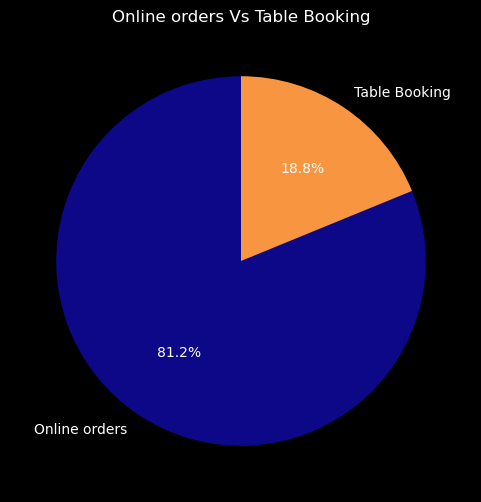

In [43]:
#visualization
plt.figure(figsize=(6,6))
color=plt.cm.plasma(np.linspace(0,0.75,2))
labels=['Online orders','Table Booking']
size=[online_orders,bookings_table]
plt.pie(size,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=color
       )
plt.title("Online orders Vs Table Booking")
plt.savefig("Online_vs_offline.png", dpi=300, bbox_inches="tight")
plt.show()

<p>Online food delivery overwhelmingly dominates Bangalore’s restaurant services, with more than four out of five restaurants supporting online orders.</p>

<h4> 4. Rating distribution by cost-category</h4>

In [46]:
#4.
bins=[0,300,600,1000,3000,6000]
labels=['Budget','Mid-Range','Premium','Expensive','Luxury']
df['cost_bins']=pd.cut(df['approx_cost(for two people)'],bins=bins,labels=labels,right=False)
avg_cost_range=df.groupby('cost_bins',observed=True)['rate'].mean().round(2)
avg_cost_range

cost_bins
Budget       3.56
Mid-Range    3.59
Premium      3.75
Expensive    4.06
Luxury       4.21
Name: rate, dtype: float64

<Figure size 600x600 with 0 Axes>

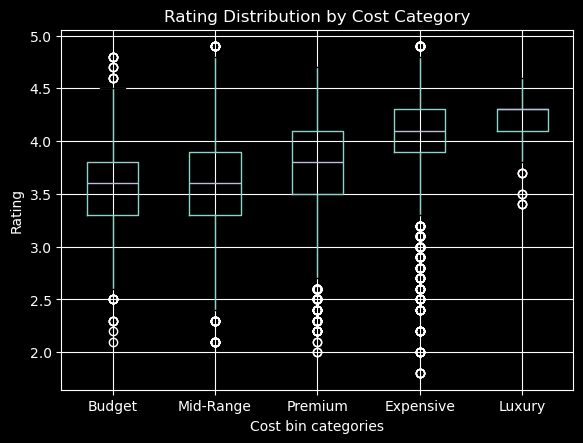

In [47]:
#visualization Box-plot
plt.figure(figsize=(6,6))
df.boxplot(column='rate',
           by='cost_bins'
          )
plt.xlabel("Cost bin categories")
plt.ylabel('Rating')
plt.title("Rating Distribution by Cost Category")
plt.suptitle('')
plt.savefig("rating_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

<h4> 5.High votes but low rated restaurants</h4>

In [49]:
high_votes_threshold = df['votes'].quantile(0.75)
low_rating_threshold = df['rate'].mean()
problematic_restaurants=df[(df['votes']>=high_votes_threshold) &(df['rate']<low_rating_threshold)]
problematic_restaurants

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),cost_bins
31,https://www.zomato.com/bangalore/foodiction-1-...,"2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...",Foodiction,Yes,No,2.8,506,+91 9916107070,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500.0,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari,Mid-Range
48,https://www.zomato.com/bangalore/beijing-bites...,"179, 1st Floor, Jawarlalnehru Road, BEML Layou...",Beijing Bites,Yes,No,3.7,679,080 28606888\r\n080 28606886,Rajarajeshwari Nagar,Casual Dining,"Momos, Dragon Chicken, Hakka Noodles, Chowmein...","Chinese, Thai",850.0,"[('Rated 3.0', 'RATED\n IÃ\x83Ã\x83Ã\x82Ã...",[],Delivery,Banashankari,Premium
74,https://www.zomato.com/bangalore/rolls-on-whee...,"Shop 33 & 30, 21st Main, Near BDA Complex, 2nd...",Rolls On Wheels,No,No,3.6,299,+91 9071734101\r\n+91 9071496800,Banashankari,Quick Bites,"Rolls, Momos, Fries, Veggie Roll, Chicken Keba...","Fast Food, Rolls, Momos",300.0,"[('Rated 3.0', ""RATED\n Had the urge to have ...",[],Delivery,Banashankari,Mid-Range
94,https://www.zomato.com/bangalore/nandhini-delu...,"304, Opposite Apollo Public School, 100 Feet R...",Nandhini Deluxe,No,No,2.6,283,080 26890011\r\n080 26890033,Banashankari,Casual Dining,"Biryani, Chicken Guntur, Thali, Buttermilk, Ma...",North Indian,600.0,"[('Rated 3.0', 'RATED\n Ididnt like much.\n\n...",[],Delivery,Banashankari,Premium
176,https://www.zomato.com/bangalore/tandoori-knig...,"34, 22nd Main, 22nd Cross, Opposite BDA, 2nd S...",Tandoori Knight,Yes,No,3.0,290,+91 9035297404\r\n+91 9731504721,Banashankari,Quick Bites,"Chicken Grill, Biryani, Roti, Chicken Masala","North Indian, Chinese, Biryani, Kebab",450.0,"[('Rated 3.0', ""RATED\n It's a small place.. ...",[],Delivery,Banashankari,Mid-Range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51196,https://www.zomato.com/bangalore/southern-spic...,"TR 9, 1st Floor, Vydehi Hospital Circle, EPIP ...",Southern Spice,Yes,No,2.6,382,+91 8197177775\n+91 8197277775,Whitefield,Casual Dining,"Chicken Guntur, Andhra Meal, Chicken Tikka Mas...","North Indian, Chinese, Biryani, Andhra",800.0,"[('Rated 1.0', ""RATED\n Here on team dinner, ...",[],Dine-out,Whitefield,Premium
51205,https://www.zomato.com/bangalore/konaseema-gra...,"120/B Export Promotion Industrial Park, Opposi...",Konaseema Grand,Yes,No,3.3,379,080 28414144\n+91 6361231730,Whitefield,Casual Dining,"Buttermilk, Chicken Biryani, Lassi, Tandoori C...","North Indian, Mughlai, Andhra, Biryani",1000.0,"[('Rated 1.0', ""RATED\n The worst restaurant,...","['Non Veg Meal', 'Non Veg Meal']",Dine-out,Whitefield,Expensive
51209,https://www.zomato.com/bangalore/chefactory-go...,"120-A3, Ground Floor, Santosh Tower, 3rd Road,...",Chefactory Gold by Flechazo,Yes,No,3.7,355,+91 9513758714,Whitefield,Casual Dining,"Chicken Tikka Biryani, Hyderabadi Chicken Dum ...","North Indian, Biryani",700.0,"[('Rated 4.0', 'RATED\n Been here for like 5-...",[],Dine-out,Whitefield,Premium
51589,https://www.zomato.com/bangalore/refresh-white...,"12/3, Whitefield Main Road, Whitefield, Bangalore",Refresh,Yes,No,3.6,298,080 28456455\n+91 9686462426,Whitefield,Quick Bites,"Poha, Vada Pav, Tea, Sandwiches, Chicken Sandw...","Continental, Chinese, Fast Food, Rolls, Momos",400.0,"[('Rated 4.0', 'RATED\n The fries which I ord...","['Poha with Tea', 'Classic Breakfast with Tea'...",Dine-out,Whitefield,Mid-Range


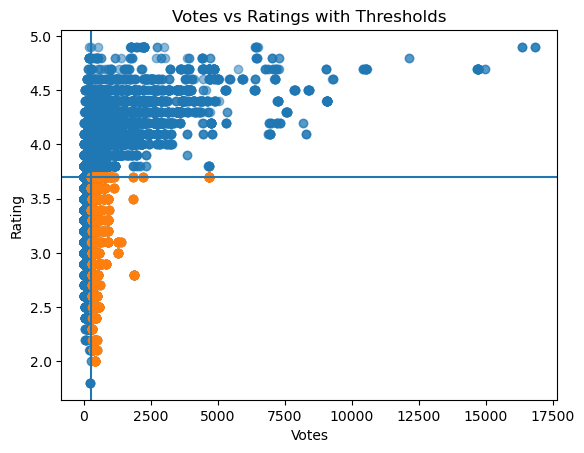

In [50]:
#5.Higher Votes but low rated restaurants
plt.style.use("default")
plt.figure()
plt.scatter(
    df['votes'],
    df['rate'],
    alpha=0.5
)
plt.scatter(
    problematic_restaurants['votes'],
    problematic_restaurants['rate'],
    alpha=0.9
)
plt.axvline(high_votes_threshold)

plt.axhline(low_rating_threshold)
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.title('Votes vs Ratings with Thresholds')
plt.savefig("votes_vs_rating.png", dpi=300, bbox_inches="tight")
plt.show()


<p> Some restaurants attract high votes but maintain poor ratings suggesting poor maintaining quality, the scatters shown in orange symbolise these restaurants</p>

<h4> 6.Top Restaurant locations with low cost but high ratings</h4>

In [53]:
df_unique = df.groupby(['name','address','listed_in(city)'], as_index=False).agg({
    'rate': 'mean',
    'votes': 'max',
    'approx_cost(for two people)': 'mean'
})
areas = df_unique['listed_in(city)'].dropna().unique()
len(areas)

30

In [54]:

from geopy.geocoders import Nominatim
import pandas as pd
import time

geolocator = Nominatim(user_agent="zomato_area_mapping")

area_latlng = {}

for area in areas:
    try:
        location = geolocator.geocode(f"{area}, Bangalore, India", timeout=10)
        time.sleep(1)   # VERY IMPORTANT (API rate limit)
        
        if location:
            area_latlng[area] = (location.latitude, location.longitude)
        else:
            area_latlng[area] = (None, None)
    except:
        area_latlng[area] = (None, None)
area_coords_df = pd.DataFrame.from_dict(
    area_latlng,
    orient='index',
    columns=['lat','lng']
).reset_index().rename(columns={'index':'listed_in(city)'})
df_unique = df_unique.merge(area_coords_df, on='listed_in(city)', how='left')

In [55]:
low_cost_threshold = 300
high_rating_threshold = df_unique['rate'].mean()

top10 = (
    df_unique[
        (df_unique['approx_cost(for two people)'] <= low_cost_threshold) &
        (df_unique['rate'] >= high_rating_threshold)
    ]
    .sort_values(by='rate', ascending=False)
    .head(10)
)


In [56]:
import folium

bangalore_map = folium.Map(location=[12.97, 77.59], zoom_start=12)

for _, row in top10.dropna(subset=['lat','lng']).iterrows():
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"""
        <b>{row['name']}</b><br>
        Area: {row['listed_in(city)']}<br>
        Rating: {row['rate']}<br>
        Cost: ₹{row['approx_cost(for two people)']}
        """,
        icon=folium.Icon(color='green')
    ).add_to(bangalore_map)


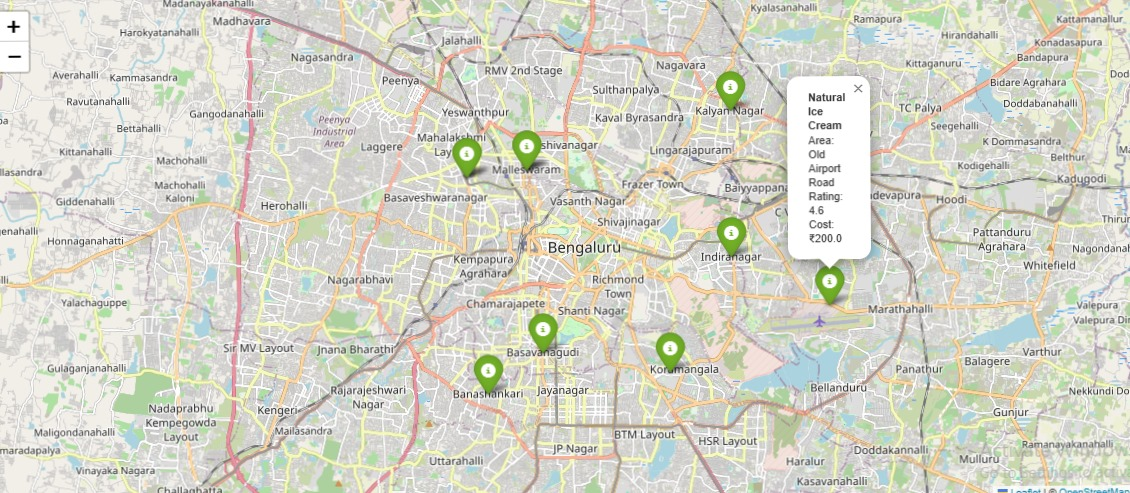

In [57]:
Image("/home/rguktrkvalley/Downloads/Best_locations.jpg")

<p>High-rated, low-cost restaurants are concentrated in competitive and high-footfall areas, reinforcing the link between location, pricing, and customer satisfaction.</p>